# Read Dataset

In [1]:
from pandas import read_csv
A = read_csv("Desktop/training_set.csv")
B = read_csv("Desktop/testing_set.csv")

In [2]:
A.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
B.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Missing Data

In [4]:
A.Alley.fillna("No Alley Access")
A.BsmtQual = A.BsmtQual.fillna("No Basement")
A.BsmtCond = A.BsmtCond.fillna("No Basement")
A.BsmtExposure = A.BsmtExposure.fillna("No Basement")
A.BsmtFinType1 = A.BsmtFinType1.fillna("No Basement")
A.BsmtFinType2 = A.BsmtFinType2.fillna("No Basement")
A.FireplaceQu = A.FireplaceQu.fillna("No Fireplace")
A.GarageType = A.GarageType.fillna("No Garage")
A.GarageFinish = A.GarageFinish.fillna("No Garage")
A.GarageQual = A.GarageQual.fillna("No Garage")
A.GarageCond = A.GarageCond.fillna("No Garage")
A.PoolQC = A.PoolQC.fillna("No Pool")
A.Fence = A.Fence.fillna("No Fence")
A.MiscFeature = A.MiscFeature.fillna("None")

In [5]:
A.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
from PM8wd import replacer
replacer(A)

In [7]:
B.Alley.fillna("No Alley Access")
B.BsmtQual = B.BsmtQual.fillna("No Basement")
B.BsmtCond = B.BsmtCond.fillna("No Basement")
B.BsmtExposure = B.BsmtExposure.fillna("No Basement")
B.BsmtFinType1 = B.BsmtFinType1.fillna("No Basement")
B.BsmtFinType2 = B.BsmtFinType2.fillna("No Basement")
B.FireplaceQu = B.FireplaceQu.fillna("No Fireplace")
B.GarageType = B.GarageType.fillna("No Garage")
B.GarageFinish = B.GarageFinish.fillna("No Garage")
B.GarageQual = B.GarageQual.fillna("No Garage")
B.GarageCond = B.GarageCond.fillna("No Garage")
B.PoolQC = B.PoolQC.fillna("No Pool")
B.Fence = B.Fence.fillna("No Fence")
B.MiscFeature = B.MiscFeature.fillna("None")
replacer(B)

In [8]:
B.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Removal of Outliers

In [9]:
from PM8wd import standardize,ANOVA,catconsep,preprocessing,outliers

In [10]:
A1 = standardize(A)

In [11]:
out = []
for i in A1.columns:
    out.extend(list(A1[(A1[i]<-3)|(A1[i]>3)].index))

In [12]:
from numpy import unique
outliers = list(unique(out))

In [13]:
A = A.drop(index=outliers,axis=0)

In [14]:
A.shape

(1015, 81)

In [15]:
A.index = range(0,1015,1)

# EDA

In [16]:
Y = A[["SalePrice"]]
X = A.drop(labels=["SalePrice","Id"],axis=1)

In [17]:
Q = A.corr()[["SalePrice"]]
Q.sort_values(by="SalePrice")

C:\Users\Dell\AppData\Local\Temp\ipykernel_12756\1232553284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q = A.corr()[["SalePrice"]]


,SalePrice
EnclosedPorch,-0.205026
OverallCond,-0.158932
BsmtFinSF2,-0.098253
MiscVal,-0.070746
MSSubClass,-0.037097
YrSold,-0.026457
Id,-0.024314
LowQualFinSF,-0.020850
3SsnPorch,-0.001348
ScreenPorch,0.017633


In [18]:
imp_con = list(Q[(Q.SalePrice<-0.15)|(Q.SalePrice>0.15)|(Q.SalePrice!=1)].index)

In [19]:
cat,con = catconsep(X)

In [20]:
imp_cat = []
for i in cat:
    q = ANOVA(A,i,"SalePrice")
    if(q<0.1):
        imp_cat.append(i)

In [21]:
imp_cols = imp_con + imp_cat
imp_cols.remove("SalePrice")
imp_cols.remove("Id")

In [22]:
X = X[imp_cols]
Xnew = preprocessing(X)

In [23]:
Xnew.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.25,0.389381,0.249485,0.625,0.4,0.951613,0.883333,0.306250,0.428919,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.25,0.415929,0.347186,0.625,0.4,0.935484,0.866667,0.253125,0.295261,0.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

In [25]:
from statsmodels.api import add_constant,OLS
from warnings import filterwarnings
filterwarnings("ignore")

In [26]:
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst).fit()
ol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     57.17
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          5.72e-302
Time:                        16:59:59   Log-Likelihood:                -8923.8
No. Observations:                 812   AIC:                         1.825e+04
Df Residuals:                     609   BIC:                         1.921e+04
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1513.7973   2945.633     -0.514      0.607   -7298.628    4271.033
MSSubClass               -2.736e+04   3.48e+04     -0.785      0.432   -9.58e+04    4.11e+04
LotFrontage              -3400.0902   6235.686     -0.545      0.586   -1.56e+04    8845.968
LotArea                   3.779e+04   8512.246      4.439      0.000    2.11e+04    5.45e+04
OverallQual               4.491e+04   8575.880      5.237      0.000    2.81e+04    6.18e+04
OverallCond               2.923e+04   4921.335      5.938      0.000    1.96e+04    3.89e+04
YearBuilt                 4.799e+04   1.17e+04      4.090      0.000    2.49e+04     7.1e+04
YearRemodAdd              6135.7144   3764.156      1.630      0.104   -1256.587    1.35e+04
MasVnrArea                3645.4609   5525.432      0.660      0.510   -7205.753    1.45e+04
BsmtFinSF1                3.372e+04   5453.958      6.182      0.000     2.3e+04    4.44e+04
BsmtFinSF2                9114.7435   8921.059      1.022      0.307   -8405.029    2.66e+04
BsmtUnfSF                 4077.0334   5248.331      0.777      0.438   -6229.991    1.44e+04
TotalBsmtSF               3.138e+04   7497.177      4.186      0.000    1.67e+04    4.61e+04
1stFlrSF                  3.874e+04   8293.748      4.671      0.000    2.25e+04     5.5e+04
2ndFlrSF                  6.303e+04   8228.968      7.660      0.000    4.69e+04    7.92e+04
LowQualFinSF             -5423.1360   1.02e+04     -0.530      0.596   -2.55e+04    1.47e+04
GrLivArea                 6.222e+04   5902.322     10.542      0.000    5.06e+04    7.38e+04
BsmtFullBath              1358.9037   2057.875      0.660      0.509   -2682.490    5400.297
BsmtHalfBath              1.305e-10   7.83e-11      1.666      0.096   -2.33e-11    2.84e-10
FullBath                 -3568.9727   7829.163     -0.456      0.649   -1.89e+04    1.18e+04
HalfBath                  -269.5352   2431.138     -0.111      0.912   -5043.968    4504.897
BedroomAbvGr             -3362.5319   6638.556     -0.507      0.613   -1.64e+04    9674.709
KitchenAbvGr              3.647e-11   5.49e-11      0.665      0.507   -7.13e-11    1.44e-10
TotRmsAbvGrd               617.6590   8511.186      0.073      0.942   -1.61e+04    1.73e+04
Fireplaces                7682.8543   6167.679      1.246      0.213   -4429.647    1.98e+04
GarageYrBlt              -1897.3047   6857.025     -0.277      0.782   -1.54e+04    1.16e+04
GarageCars                1.759e+04   9567.578      1.839      0.066   -1197.706    3.64e+04
GarageArea                1.594e+04   8696.349      1.833      0.067   -1136.090     3.3e+04
WoodDeckSF                1.481e+04   3266.725      4.533      0.000    8393.474    2.12e+04
OpenPorchSF               6627.1206   3598.567      1.842      0.066    -439.987    1.37e+04
EnclosedPorch 

In [27]:
ol.rsquared_adj

0.9332962747750478

In [28]:
ol.pvalues.sort_values().index[-1]

'SaleType_Con'

In [29]:
for i in range(0,30,1):
    prev_rsq = round(ol.rsquared_adj,5)
    col_drp = ol.pvalues.sort_values().index[-1]
    if(col_drp=="const"):
        col_drp = ol.pvalues.sort_values().index[-2]
        Xnew = Xnew.drop(labels=col_drp,axis=1)
    else:
        Xnew = Xnew.drop(labels=col_drp,axis=1)
    
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain)
    ol = OLS(ytrain,xconst).fit()
    curr_rsq = round(ol.rsquared_adj,5)
    if(curr_rsq >= prev_rsq):
        print(col_drp,curr_rsq,prev_rsq)

SaleType_Con 0.9333 0.9333
GarageFinish_Fin 0.9333 0.9333
HeatingQC_Ex 0.9333 0.9333
Heating_GasA 0.9333 0.9333
ExterCond_Gd 0.9333 0.9333
Exterior1st_Stucco 0.9333 0.9333
Exterior2nd_HdBoard 0.9333 0.9333
Exterior2nd_VinylSd 0.93341 0.9333
MSZoning_RM 0.93341 0.93341
GarageFinish_RFn 0.93351 0.93341
Foundation_Wood 0.93351 0.93351
Foundation_PConc 0.93362 0.93351
Foundation_CBlock 0.93373 0.93362
TotRmsAbvGrd 0.93384 0.93373
Foundation_Stone 0.93395 0.93384
KitchenAbvGr 0.93395 0.93395
Exterior2nd_Stone 0.93395 0.93395
BsmtHalfBath 0.93395 0.93395
Neighborhood_IDOTRR 0.93395 0.93395
GarageType_Basment 0.93395 0.93395
LandContour_Lvl 0.93395 0.93395
PoolArea 0.93395 0.93395
FireplaceQu_TA 0.93395 0.93395
BldgType_Twnhs 0.93395 0.93395
Neighborhood_Somerst 0.93405 0.93395
FireplaceQu_No Fireplace 0.93416 0.93405
HalfBath 0.93426 0.93416
YrSold 0.93437 0.93426
GarageQual_TA 0.93437 0.93437
BsmtFinType2_No Basement 0.93437 0.93437


In [30]:
cols_to_use = list(Xnew.columns)

# Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [32]:
tr_err

9869.404556650246

In [33]:
ts_err

9418255835777.672

In [34]:
alphas = []
q = 0.2
for i in range(0,1500,1):
    alphas.append(q)
    q = round(q + 0.01,2)

In [35]:
from sklearn.linear_model import Ridge
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

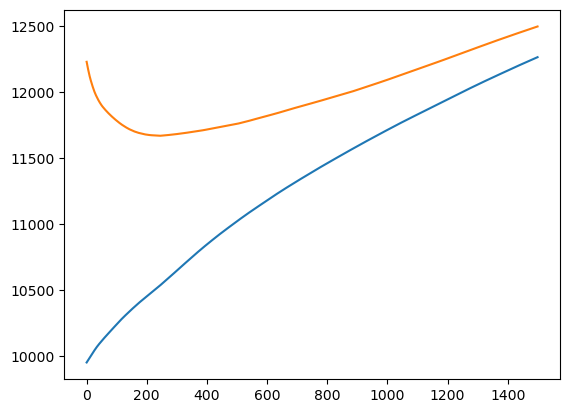

In [36]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [37]:
rr = Ridge(alpha=15.1)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [38]:
tr_err

12255.08889412167

In [39]:
ts_err

12489.701383421616

# Train the model with entire data prior to making final predictions

In [40]:
rr = Ridge(alpha=15.1)
model = rr.fit(Xnew,Y)